In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('../../data/quark_gluon_dataset/quark_gluon_20000_1.npz', allow_pickle=True)
data['x_train'].shape

(18000, 40, 40, 3)

In [3]:
def plot(channel=0):
    fig2 = plt.figure(figsize=(10,10))
    r = 1
    c = 2
    index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
    for i in range(2):
        fig2.add_subplot(r,c,i+1)
        plt.imshow(np.log(np.mean(data['x_train'][index[i],:,:,channel], axis=0)))
        plt.title('Quark' if i == 0 else 'Gluon')

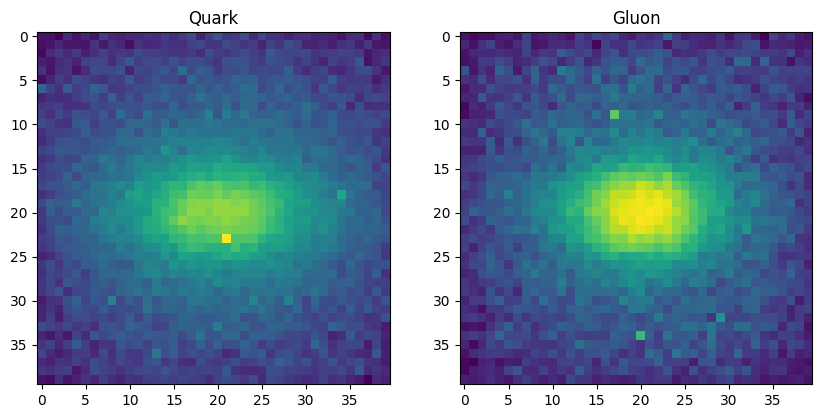

In [4]:
plot()

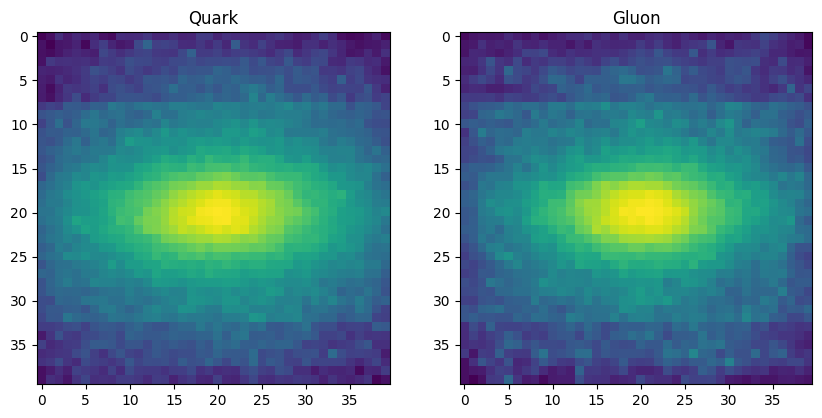

In [5]:
plot(channel=1)

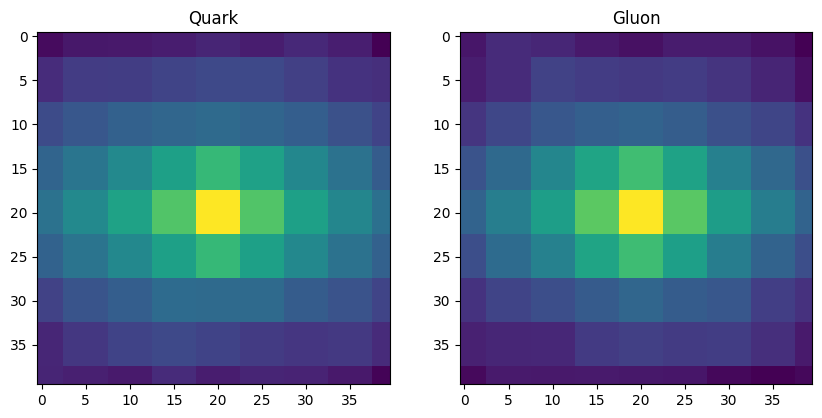

In [6]:
plot(channel=2)

In [8]:
x_train = data["x_train"]
y_train = data["y_train"]
x_test = data["x_test"]
y_test = data["y_test"]

print(f"Data Loading: x_train shape {x_train.shape}, x_test shape: {x_test.shape}")
print(f"Data Loading: y_train shape {y_train.shape}, y_test shape: {y_test.shape}")

Data Loading: x_train shape (18000, 40, 40, 3), x_test shape: (2000, 40, 40, 3)
Data Loading: y_train shape (18000,), y_test shape: (2000,)


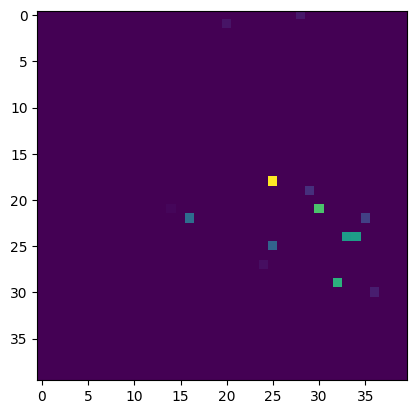

In [9]:
plt.imshow(x_train[3][:,:,0])

In [10]:
# Create pairs of images and labels
def create_pairs(images, labels):
    pairs = []
    pair_labels = []

    num_classes = len(np.unique(labels)) # 2
    digit_indices = [np.where(labels == i)[0] for i in range(num_classes)]
    # print(digit_indices)

    for idx1 in range(len(images)):
        x1, label1 = images[idx1], labels[idx1]
        idx2 = np.random.choice(digit_indices[int(label1)])
        x2 = images[idx2]

        # if x1==x2, label set to 1
        pairs.append([x1, x2])
        pair_labels.append(1)

        # if x1!=x2, label set to 0
        label2 = (label1 + np.random.randint(1, num_classes)) % num_classes
        idx2 = np.random.choice(digit_indices[int(label2)])
        x2 = images[idx2]
        pairs.append([x1, x2])
        pair_labels.append(0)

    return np.array(pairs), np.array(pair_labels)

In [11]:
pairs_train, labels_train = create_pairs(x_train[:,:,:,0], y_train)
pairs_test, labels_test = create_pairs(x_test[:,:,:,0], y_test)

print(f"After pair creation: pairs_train: {pairs_train.shape}, pairs_test: {pairs_test.shape}")
print(f"After pair creation: labels_train: {labels_train.shape}, labels_test: {labels_test.shape}")

After pair creation: pairs_train: (36000, 2, 40, 40), pairs_test: (4000, 2, 40, 40)
After pair creation: labels_train: (36000,), labels_test: (4000,)


In [12]:
def plot_sample_pairs(pairs, labels, shape, num_samples=5):
    plt.figure(figsize=(15, num_samples * 2))
    for i in range(num_samples):
        ax = plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(pairs[i, 0].reshape(shape, shape))
        ax.axis('off')

        ax = plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(pairs[i, 1].reshape(shape, shape))
        ax.axis('off')

        label = labels[i]
        plt.title(f'Sample: {i}, Label: {label}')

    plt.tight_layout()
    plt.show()

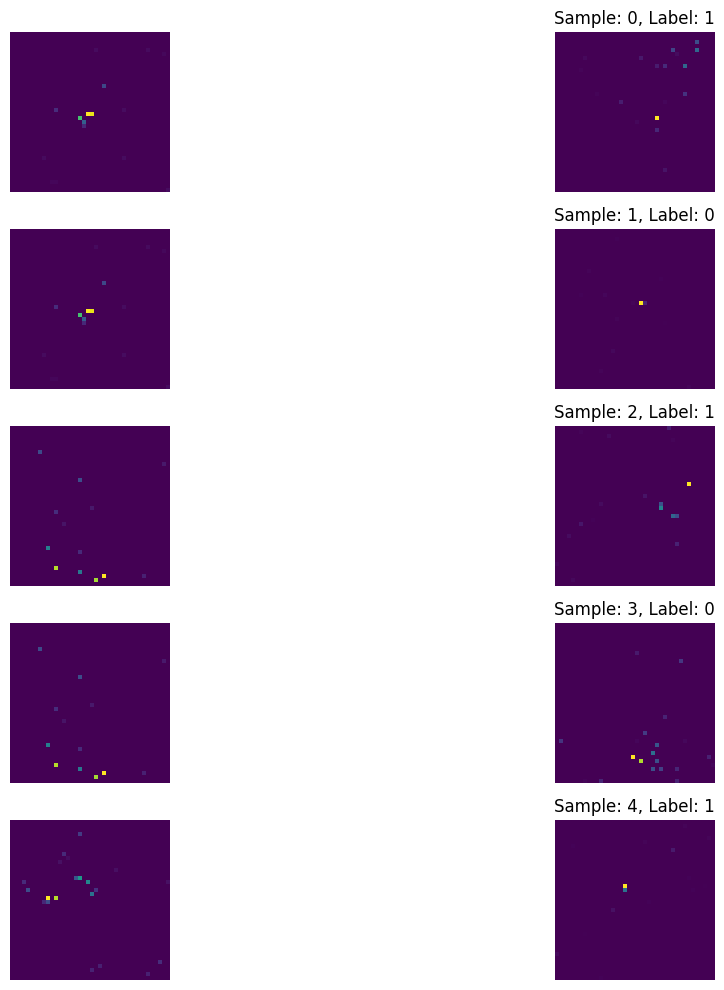

In [13]:
plot_sample_pairs(pairs_train, labels_train, shape=40, num_samples=5)

In [14]:
np.savez_compressed('../../data/quark_gluon_dataset/qg_20000_pairs_c1.npz', **{
    'pairs_train': pairs_train,
    'labels_train':labels_train,
    'pairs_test':pairs_test,
    'labels_test':labels_test
})